In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('healthcare_dataset.csv.zip')
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
data.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [7]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Date of Discharge'] = pd.to_datetime(data['Discharge Date'])

In [10]:
#Data Exploration

data['Gender'].value_counts()

,count
Gender,
Male,27774
Female,27726


In [11]:
blood_gender_group = data.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count').sort_values(by='Count', ascending=True)
blood_gender_group

,Blood Type,Gender,Count
15,O-,Male,3365
8,B+,Female,3377
1,A+,Male,3392
4,AB+,Female,3438
2,A-,Female,3449
13,O+,Male,3453
6,AB-,Female,3461
10,B-,Female,3461
12,O+,Female,3464
11,B-,Male,3483


In [12]:
data['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [13]:
data['Medical Condition'].value_counts()

,count
Medical Condition,
Arthritis,9308
Diabetes,9304
Hypertension,9245
Obesity,9231
Cancer,9227
Asthma,9185


In [14]:
data['Test Results'].value_counts()

,count
Test Results,
Abnormal,18627
Normal,18517
Inconclusive,18356


<ipython-input-15-a9799d510b7c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Test Results', palette='pastel')


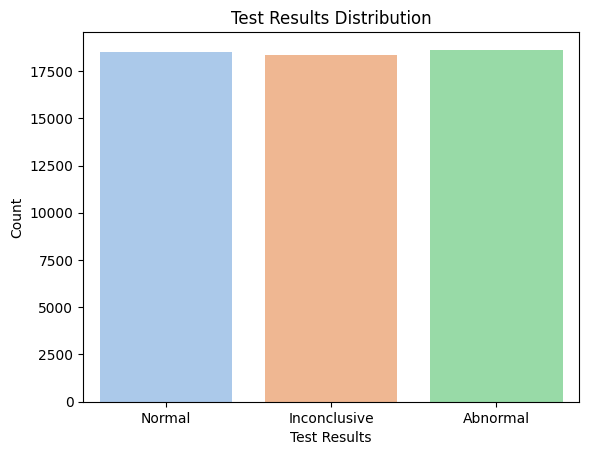

In [15]:
sns.countplot(data=data, x='Test Results', palette='pastel')
plt.title('Test Results Distribution')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

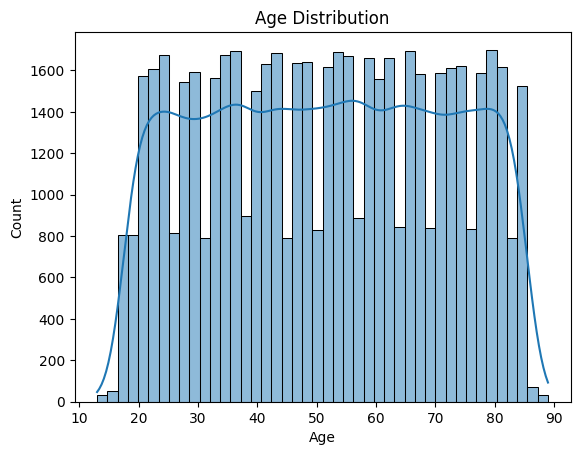

In [16]:
#Visual representation of Age Distribution
sns.histplot(data['Age'],kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

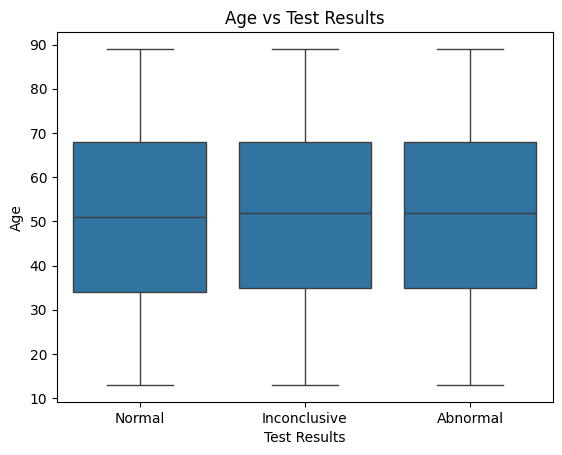

In [17]:
#Relationship between Age and Test Results
sns.boxplot(data=data, x='Test Results', y='Age')
plt.title('Age vs Test Results')
plt.xlabel('Test Results')
plt.ylabel('Age')
plt.show()


Test Results by Medical Condition:
   Medical Condition  Test Results  Count
0          Arthritis      Abnormal   3188
1          Arthritis  Inconclusive   3088
2          Arthritis        Normal   3032
3             Asthma      Abnormal   3009
4             Asthma  Inconclusive   3029
5             Asthma        Normal   3147
6             Cancer      Abnormal   3118
7             Cancer  Inconclusive   3060
8             Cancer        Normal   3049
9           Diabetes      Abnormal   3168
10          Diabetes  Inconclusive   3046
11          Diabetes        Normal   3090
12      Hypertension      Abnormal   3012
13      Hypertension  Inconclusive   3091
14      Hypertension        Normal   3142
15           Obesity      Abnormal   3132
16           Obesity  Inconclusive   3042
17           Obesity        Normal   3057


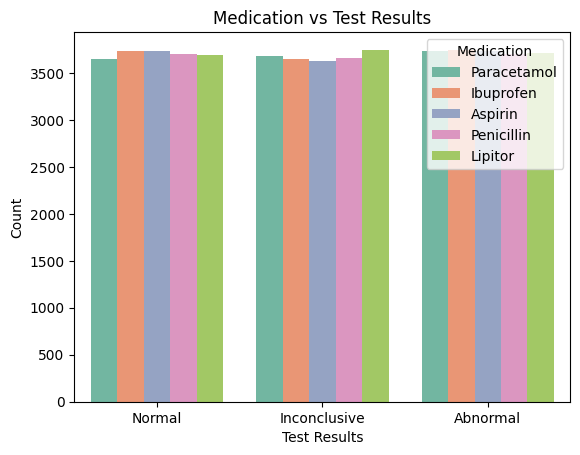

In [18]:
condition_vs_test = data.groupby(['Medical Condition', 'Test Results']).size().reset_index(name='Count')
print("Test Results by Medical Condition:")
print(condition_vs_test)

#Visualization for Medication
sns.countplot(data=data, x= 'Test Results', hue= 'Medication', palette='Set2')
plt.title('Medication vs Test Results')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()